# Veri Bilimi Adımları - Makine Öğrenmesi için Veri Hazırlama

### 1. Veri Toplama ve Anlama
 - Veri Kaynaklarını İnceleme: Hangi kaynaklardan veri toplandığını ve bu kaynakların güvenilirliğini değerlendirin.
   
 - Veri Türünü Belirleme: Verinin yapısı (örneğin: metin, sayısal, kategorik, tarih vb.) ve tipi hakkında bilgi sahibi olun.
   
 - Hedef Değişkenin Belirlenmesi: Çözümlenecek problemi ve hedef değişkeni (bağımlı değişken) belirleyin.
   
 - Ön Analiz: Veriyi incelemek için gözlemler yapın; eksik değerler, aykırı değerler veya verideki dağılımlar hakkında fikir edinin.



In [2]:
import pandas as pd
import numpy as np

# Örnek bir DataFrame oluşturma
data = {'column1': [1, 2, np.nan, 4],
        'column2': [5, np.nan, np.nan, 8]}
df = pd.DataFrame(data)

# Eksik değerleri bulma
print(df.isnull())

# Her bir sütünda kaç tane eksik değer olduğunu bulma
print(df.isnull().sum())

# Herhangi bir eksik değer var mı kontrolü
print(df.isnull().any().any())

   column1  column2
0    False    False
1    False     True
2     True     True
3    False    False
column1    1
column2    2
dtype: int64
True


### Eksik Verilerle Başa Çıkma Yöntemleri

- Silme: Eksik değeri olan gözlemleri veya sütunları silmek.
  
- Doldurma: Eksik değerleri ortalama, medyan, mod, sabit bir değer veya tahmini değerlerle doldurmak.
  
- Tahmin: Makine öğrenmesi algoritmaları kullanarak eksik değerleri tahmin etmek.
  
- Etiketleme: Eksik değerleri özel bir kategoriyle etiketlemek.

In [6]:
### SILME
import pandas as pd
import numpy as np

# Örnek veri seti oluşturma
data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, 7, 8],
        'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)

# Tüm değerleri eksik olan satırları silme
df.dropna(how='all', inplace=True)

# Belirli bir eşik değerin üzerinde eksik değeri olan sütunları silme
df.dropna(thresh=3, axis=1, inplace=True)

# DOLDURMA

# Eksik değerleri ortalama ile doldurma
df.fillna(df.mean(), inplace=True)

# Eksik değerleri ileriye doğru doldurma (forward fill)
df.fillna(method='ffill', inplace=True)

# Eksik değerleri geriye doğru doldurma (backward fill)
df.fillna(method='bfill', inplace=True)

# BASKA BIR DOLDURMA YONTEMI ONEMLIIII !!!!  IMU
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Veri setini yükleyin (örnek olarak)
data = pd.read_csv("customer_data.csv")

# Eksik değerleri inceleyin
print(data.isnull().sum())

# MICE imputer'ı oluşturun
mice_imputer = IterativeImputer(random_state=0)

# Eksik değerleri doldurun
data_filled = pd.DataFrame(mice_imputer.fit_transform(data), columns=data.columns)

# Doldurulmuş veriyi kaydedin
data_filled.to_csv("filled_customer_data.csv", index=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3268\398586731.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3268\398586731.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


### Aykırı Deger Ayıklama

In [ ]:
import pandas as pd
import numpy as np

# Örnek bir veri seti oluşturalım
data = {'column1': [1, 2, 3, 4, 5, 100],
        'column2': [10, 20, 30, 40, 50, 2]}
df = pd.DataFrame(data)

import matplotlib.pyplot as plt

# Box plot çizdirme
plt.boxplot(df['column1'])
plt.title('Column1 Box Plot')
plt.show()

from scipy import stats

# Z-skoru hesaplama
z_scores = np.abs(stats.zscore(df))

# Belirli bir eşik değerin üzerindeki değerleri aykırı değer olarak kabul etme
threshold = 3
print(np.where(z_scores > threshold))

# IQR hesaplama
Q1 = df['column1'].quantile(0.25)
Q3 = df['column1'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerler için sınırlar belirleme
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtreleme
outliers = df[(df['column1'] < lower_bound) | (df['column1'] > upper_bound)]
print(outliers)

### SILME
df_cleaned = df[(z_scores < threshold).all(axis=1)]

### DONUSTURME
import numpy as np
df['column1_log'] = np.log(df['column1'])

### KAPSAMA
# Örneğin, aykırı değerleri en yakın değerle değiştirme
df['column1'] = np.where(df['column1'] > upper_bound, upper_bound, df['column1'])


## Veri Dönüşümleri
#### Standardizasyon
#### Normalleştirme
#### Özellik Mühendisliği
#### Boyut Azaltma
#### One-Hot Encoder
#### Label Encoder


In [ ]:
# STANDARDİZASYON : Standardizasyon, verilerin ortalaması sıfır ve standart sapması 1 olacak şekilde ölçeklendirilmesidir.
#Bu sayede, tüm özellikler aynı öneme sahip hale gelir.

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Örnek veri seti
data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Standartlaştırma :
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)


# NORMALİZASYON : Normalleştirme, verileri 0 ile 1 arasında bir aralığa sıkıştırma işlemidir. Min-max ölçeklendirme olarak da bilinir.
from sklearn.preprocessing import MinMaxScaler

# Normalleştirme
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)


# Özellik Mühendisliği: Yeni özellikler oluşturarak modelin öğrenme yeteneğini artırabiliriz. 
# Örneğin, tarih verisinden gün, ay, yıl gibi yeni özellikler çıkarabilir veya numerik verilerden kategorik özellikler oluşturabiliriz.

import pandas as pd

# Tarih verisinden yeni özellikler oluşturma
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

# Numerik veriden kategorik özellik oluşturma
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 60, 100], labels=['Genç', 'Yetişkin', 'Orta Yaşlı', 'Yaşlı'])


# BOYUT AZALTMA : Çok boyutlu verilerin daha düşük boyutlu bir uzaya projeksiyonu yapılarak hesaplama maliyeti düşürülebilir ve modelin karmaşıklığı azaltılabilir.

from sklearn.decomposition import PCA

# PCA ile boyut azaltma
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

print(reduced_df)


# One-Hot Encoding : Kategorik verileri, makine öğrenmesi algoritmalarının daha iyi anlamasına olanak sağlayan numerik temsillere dönüştürmek için kullanılır.
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Örnek veri seti
data = {'color': ['red', 'green', 'blue', 'red']}
df = pd.DataFrame(data)

# One-Hot Encoder oluşturma
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

print(encoded_df)


# Label Encoding : Kategorik verileri, sıralı bir şekilde sayısal etiketlere dönüştürmek için kullanılır.
from sklearn.preprocessing import LabelEncoder

# Label Encoder oluşturma
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['color'])
df['color_encoded'] = encoded_data

print(df)


## PCA ile LDA karşılaştırması
-     PCA denetimsiz öğrenme    , LDA denetimli öğrenme  
- lda: Boyut azaltma, görselleştirme, gürültü azaltma
- pca: Sınıflandırma, özellik seçimi

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

colors = ["red", "blue", "green"]

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color = color, alpha = 0.8, label = target_name)
plt.legend()
plt.title("PCA of Iris Dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color = color, alpha = 0.8, label = target_name)
plt.legend()
plt.title("LDA of Iris Dataset")


#t-SNE, yüksek boyutlu verileri daha düşük boyutlu (genellikle 2 veya 3 boyutlu) bir uzaya sıkıştırarak
# görselleştirmek için kullanılan bir makine öğrenmesi algoritmasıdır. 

from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

mnist = fetch_openml("mnist_784", version=1)

X = mnist.data
y = mnist.target.astype(int)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = y, cmap = "tab10", alpha=0.6)
plt.title("TSNE of MNIST Dataset")
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")


 ## Regularization
 #### Regularization, makine öğrenmesi modellerinin aşırı uyum (overfitting) sorununu önlemek için kullanılan bir tekniktir.
 -

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge
ridge = Ridge()
ridge_param_grid = {"alpha": [0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv = 5)
ridge_grid_search.fit(X_train, y_train)
print("Ridge en iyi parameters: ", ridge_grid_search.best_params_)
print("Ridge en iyi score: ", ridge_grid_search.best_score_)

best_ridge_model = ridge_grid_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print("ridge_mse: ",ridge_mse)
print()

# Lasso
lasso = Lasso()
lasso_param_grid = {"alpha": [0.1, 1, 10, 100]}

lass_grid_search = GridSearchCV(lasso, lasso_param_grid, cv = 5)
lass_grid_search.fit(X_train, y_train)
print("Lasso en iyi parameters: ", lass_grid_search.best_params_)
print("Lasso en iyi score: ", lass_grid_search.best_score_)

best_lasso_model = lass_grid_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print("lasso_mse: ",lasso_mse)

# MinMaxScaler: Verileri ölçeklendirerek farklı özelliklerin eşit ağırlıkta olmasını sağlar.
# Ridge ve Lasso: Modelin karmaşıklığını azaltarak overfitting sorununu çözer

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet()
elastic_net_param_grid = {"alpha": [0.1, 1, 10, 100],
                          "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]} # l1 or l2 penalty ratio

elastic_net_grid_search = GridSearchCV(elastic_net, elastic_net_param_grid, cv = 5)
elastic_net_grid_search.fit(X_train, y_train)
print("En iyi parameter: ",elastic_net_grid_search.best_params_)
print("En iyi score: ",elastic_net_grid_search.best_score_)

best_elastic_net_model = elastic_net_grid_search.best_estimator_
y_pred = best_elastic_net_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("mse: ",mse)


Ridge en iyi parameters:  {'alpha': 0.1}
Ridge en iyi score:  0.45647798015266455
ridge_mse:  2856.486887670654

Lasso en iyi parameters:  {'alpha': 0.1}
Lasso en iyi score:  0.4555104983088939
lasso_mse:  2798.1934851697188
En iyi parameter:  {'alpha': 0.1, 'l1_ratio': 0.9}
En iyi score:  0.2525948988969631
mse:  3792.129166396345


## Veri Dengelenmesi Teknikleri
Veri dengesizliği problemini çözmek için çeşitli teknikler kullanılabilir:

#### 1. Oversampling
Random Oversampling: Azınlık sınıfındaki örnekleri rastgele çoğaltarak sınıflar arasındaki dengesizliği azaltır.
SMOTE (Synthetic Minority Over-sampling Technique): Azınlık sınıfındaki örneklerin sentetik benzerlerini oluşturarak yeni örnekler üretir. Bu sayede, modelin genelleme yeteneği artırılabilir.
#### 2. Undersampling
Random Undersampling: Çoğunluk sınıfındaki örnekleri rastgele çıkararak sınıflar arasındaki dengesizliği azaltır. Ancak bu yöntem, veri kaybına neden olabilir.
Cluster Centroids: Çoğunluk sınıfındaki örnekleri kümelere ayırır ve her kümeden bir örnek seçerek yeni bir veri kümesi oluşturur.

# Veri Görselleştirme ve Korelasyon Oluşturma

#### Dağılım Grafikleri ve Kutu Grafikleri: Verinin dağılımını ve aykırı değerleri görmek için dağılım grafikleri ve kutu grafikleri oluşturun.
#### Korelasyon Analizi: Özellikler arasındaki ilişkiyi görmek için korelasyon matrisi çıkarın ve hangi özelliklerin model için daha anlamlı olduğunu belirleyin.
#### Özelliklerin Hedefle İlişkisi: Her bir özelliğin hedef değişkenle olan ilişkisini analiz edin.

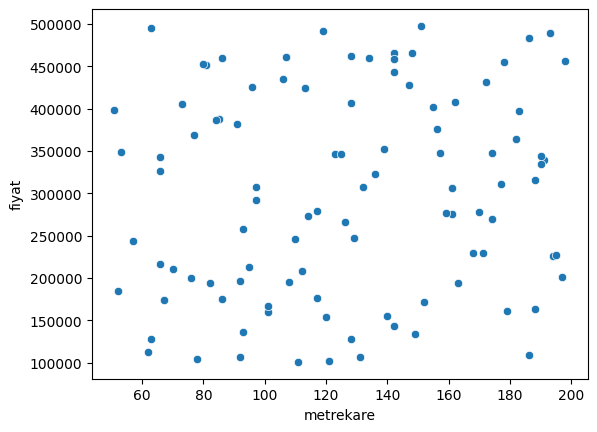

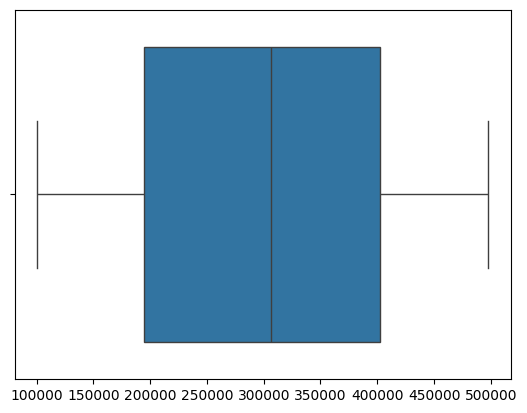

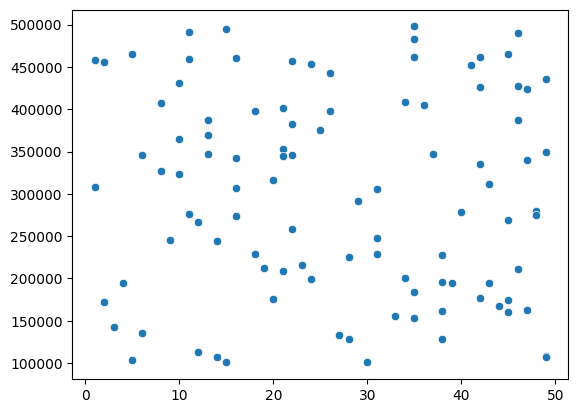

              metrekare  oda_sayisi  banyo_sayisi       yas     fiyat
metrekare      1.000000    0.022039     -0.062653  0.078846  0.128912
oda_sayisi     0.022039    1.000000      0.074902  0.096639  0.070197
banyo_sayisi  -0.062653    0.074902      1.000000  0.098577 -0.022601
yas            0.078846    0.096639      0.098577  1.000000 -0.060755
fiyat          0.128912    0.070197     -0.022601 -0.060755  1.000000


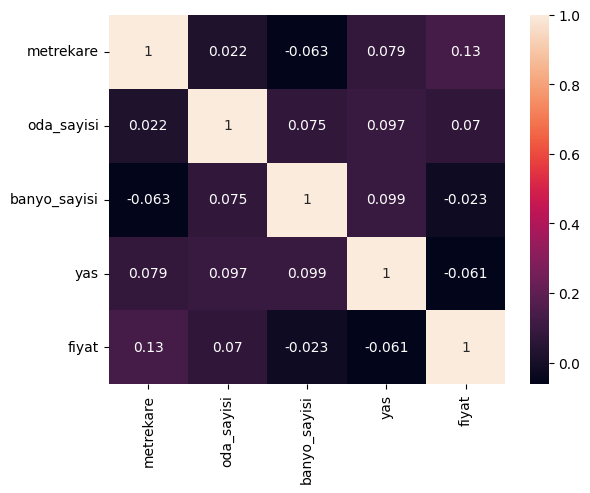

In [39]:
# Ev fiyatları veri seti için örnek kod
import pandas as pd
import seaborn as sns

# Veri setini yükleyin
import numpy as np
import matplotlib.pyplot as plt


# Ev satışı için örnek veri seti
data = {'metrekare': np.random.randint(50, 200, 100),
        'oda_sayisi': np.random.randint(1, 5, 100),
        'banyo_sayisi': np.random.randint(1, 3, 100),
        'yas': np.random.randint(0, 50, 100),
        'fiyat': np.random.randint(100000, 500000, 100)}
df = pd.DataFrame(data)


# Metrekare ve ev fiyatı arasındaki ilişki
sns.scatterplot(x=df['metrekare'], y=df['fiyat'])  # Access columns using DataFrame syntax
plt.show()

sns.boxplot(x=data['fiyat'])
plt.show()



# Sayısal bir özellik ile hedef değişken arasındaki ilişki
sns.scatterplot(x=data['yas'], y=data['fiyat'])
plt.show()

# Korelasyon matrisi hesaplama
correlation_matrix = df.corr()
print(correlation_matrix)
# Korelasyon matrisini görselleştirme
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Veri Seti Bölme İşlemleri


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Iris veri setini yükleme
iris = load_iris()
X = iris.data
y = iris.target

# Veriyi eğitim ve test setlerine ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi eğitim, doğrulama ve test setlerine ayırma (örnek)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Cross-validation (örnek)
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, cv=5)
print(scores)
# train_test_split: Bu fonksiyon, veriyi eğitim ve test setlerine ayırmak için kullanılır.
# test_size: Test setinin büyüklüğünü belirtir (0 ile 1 arasında bir değer).
# random_state: Rastgele sayı üretecinin başlangıç değerini belirtir. Bu sayede sonuçlar tekrarlanabilir hale gelir.
# cross_val_score: Bu fonksiyon, cross-validation işlemini yapar.
# cv: Cross-validation'da kaç katlama yapılacağını belirtir.

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


## Hiperparametre ayarlama,Hyperparameter Tuning: Model Tuning de Denir
- Model Performansını Artırmak: Doğru hiperparametreler seçildiğinde, model eğitim verisine aşırı uyum sağlamadan (overfitting) veya yeterince uyum sağlayamadan (underfitting) genelleyebilir.
- Farklı Senaryolara Uyum Sağlamak: Aynı model farklı veri setlerinde farklı hiperparametrelerle daha iyi sonuç verebilir.
- Hesaplama Süresini Optimize Etmek: Bazı hiperparametre kombinasyonları daha hızlı öğrenme sağlayabilir.


In [41]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parametreler için deneyilecek değerler
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Model oluşturma
svc = SVC()

# Grid Search ile en iyi parametreleri bulma
grid = GridSearchCV(svc, param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# En iyi parametreler ve skor
print(grid_result.best_params_)
print(grid_result.best_score_)

## RandomizedSearchCV  Daha verimli diyorlar gridesearche göre
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Parametreler için deneyilecek dağılımlar
param_distributions = {'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf']}

# Model oluşturma
svc = SVC()

# Rastgele arama ile en iyi parametreleri bulma
random_search = RandomizedSearchCV(svc, param_distributions, n_iter=10, cv=5)
random_result = random_search.fit(X_train, y_train)

# En iyi parametreler ve skor
print(random_result.best_params_)
print(random_result.best_score_)


# Grid Search ile Rasgele search Karşılaştırma,
# Grid Search: Tüm olası kombinasyonları sistematik olarak denedikçe daha kesin sonuçlar verebilir ancak hesaplama maliyeti yüksektir.
# Rastgele Arama: Daha az kesin sonuçlar verebilir ancak daha hızlıdır ve büyük hiperparametre alanlarında daha etkilidir.

{'C': 1, 'kernel': 'linear'}
0.9647058823529411
{'C': 4.171469435232005, 'kernel': 'linear'}
0.9647058823529411


# Modelin Eğitilmesi
##### Eğitim Sürecinin Temel Adımları:

- Veri Hazırlığı: Veri temizliği, dönüştürme ve özellik mühendisliği gibi işlemlerle verinin modele uygun hale getirilmesi.
- Model Seçimi: Problemin türüne (sınıflandırma, regresyon vb.) ve veri özelliklerine göre uygun bir model seçimi (örn: Lojistik regresyon, karar ağaçları, sinir ağları).
- Parametre Ayarlama: Modelin hiperparametrelerinin (örn: öğrenme oranı, ağaç derinliği) belirlenmesi ve ayarlanması.
- Eğitim: Modelin eğitim verisi üzerinde tekrarlı olarak çalıştırılması ve parametrelerin güncellenmesi.

##### Farklı Problem Türleri İçin Kullanılan Metrikler:

- Sınıflandırma: Doğruluk, F1 skoru, Precision, Recall, ROC eğrisi altında kalan alan (AUC), karışıklık matrisi.
- Regresyon: RMSE, MAE (Mean Absolute Error), R-kare.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Veri yükleme ve hazırlama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model seçimi ve hiperparametreler
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Model eğitimi ve değerlendirme
grid_model = grid.fit(X_train, y_train)
print(grid_model.best_params_)
predictions = grid_model.predict(X_test)
print(accuracy_score(y_test, predictions))

## Model Ensembl, Özellik Önem Analizi ve Model Açıklayabilirliği
#### Model Ensembl
- Birden fazla modelin bir araya getirilerek tek bir güçlü model oluşturma yöntemidir. Bu sayede, bireysel modellerin zayıflıkları giderilir ve genel performans artırılır.

- Örnek: Bir ev fiyatını tahmin etmek istediğimizi düşünelim. Farklı makine öğrenmesi algoritmaları (lineer regresyon, karar ağacı, rastgele orman) ile ayrı ayrı modeller oluşturabiliriz. Daha sonra, bu modellerin tahminlerini ortalama alarak veya oylama sistemi ile birleştirerek daha doğru tahminler elde edebiliriz.


- Örnek: Bir kredi başvurusunun onaylanıp onaylanmayacağını tahmin eden bir model düşünelim. Özellik önem analizi sayesinde, hangi özelliklerin (gelir, kredi skoru, borç miktarı vb.) kişinin krediye uygunluğunu belirlemede daha önemli olduğunu görebiliriz.

## Özellik Önem Analizi Yöntemleri:

- Karar Ağacı Tabanlı Yöntemler: Özelliklerin karar ağacındaki yerleşimine göre önem derecesi belirlenir.
- Permutasyon Önemliliği: Her bir özelliğin değerleri rastgele karıştırılır ve modelin performansındaki düşüşe bakılarak önemi ölçülür.
- SHAP (SHapley Additive exPlanations): Oyun teorisinden ilham alan bir yöntem olup, her bir özelliğin model çıktısına katkısını açıklar.
#### Model Açıklayabilirliği
- Modelin karar verme sürecinin insan tarafından anlaşılabilir hale getirilmesi sürecidir. Bu, özellikle tıbbi teşhis, finansal risk değerlendirmesi gibi kritik kararların alındığı durumlarda önemlidir.

##### Örnek: Bir görüntü tanıma modelinin bir kedi resmini kedi olarak sınıflandırmasının nedenini açıklayabilmek için, modelin hangi piksellere daha fazla dikkat ettiğini görselleştirebiliriz.

## Model Açıklayabilirliği Yöntemleri:

- LIME (Local Interpretable Model-Agnostic Explanations): Karmaşık modelleri yerel olarak basit modellerle açıklamak için kullanılır.
- SHAP: Özellik önem analizi için kullanılan SHAP yöntemi, aynı zamanda model açıklayabilirliği için de kullanılır.
- Karar Ağacı Görselleştirme: Karar ağaçlarının yapısı sayesinde modelin karar verme süreci kolayca takip edilebilir.
#### Performans Metrikleri
- Sınıflandırma
Doğruluk (Accuracy): Doğru tahmin edilen örneklerin toplam örnek sayısına oranı.
F1 Skoru: Precision ve Recall değerlerinin harmonik ortalaması.
Precision: Pozitif olarak sınıflandırılan örnekler içinde gerçekten pozitif olanların oranı.
Recall: Gerçekten pozitif olan örnekler içinde pozitif olarak sınıflandırılanların oranı.
ROC Eğrisi Altında Kalan Alan (AUC): Sınıflandırıcının ne kadar iyi ayrım yapabildiğini gösterir.
Karışıklık Matrisi: Farklı sınıflar arasındaki doğru ve yanlış tahminleri gösteren bir tablo.
- Regresyon
RMSE (Root Mean Squared Error): Tahmin hatalarının karelerinin ortalamasının karekökü.
MAE (Mean Absolute Error): Tahmin hatalarının mutlak değerlerinin ortalaması.
R-kare: Modelin verinin ne kadarını açıkladığını gösterir.
Örnek Kullanım:

Bir kredi kartı dolandırıcılığını tespit etmek için bir sınıflandırma modeli geliştirdiğimizi düşünelim. Modelin performansını değerlendirmek için aşağıdaki metrikleri kullanabiliriz:

Doğruluk: Modelin genel olarak ne kadar doğru tahmin yaptığı.
Precision: Dolandırıcılık olarak yanlışlıkla işaretlenen işlemlerin sayısını azaltmak için önemlidir.
Recall: Gerçekten dolandırıcılık olan işlemlerin kaçını doğru tahmin ettiğini gösterir.
F1 Skoru: Precision ve Recall arasındaki dengeyi ölçer.
Örnek Python Kodu (Scikit-learn):


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Veri seti hazırlama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion_matrix)

## Özellik Önem Analizi
- Ne İşe Yarar: Modelin hangi özelliklere daha çok önem verdiğini belirleyerek, modelin karar verme sürecinde hangi özelliklerin daha etkili olduğunu anlamamızı sağlar.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Veri yükleme
data = pd.read_csv("veri.csv")
X = data.drop("hedef", axis=1)
y = data["hedef"]

# Model oluşturma ve eğitme
model = RandomForestClassifier()
model.fit(X, y)

# Özellik önemlerini elde etme
importances = model.feature_importances_

# Özellikleri önemlerine göre sıralama
indices = np.argsort(importances)[::-1]

# Özellik isimleri
feature_names = X.columns

# Özellik önemlerini görselleştirme
plt.figure(figsize=(10,6))
plt.title("Özellik Önem Analizi")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Özellikler")
plt.ylabel("Önem")
plt.show()

# Random Forest: Karar ağaçlarından oluşan bir ensembl yöntemidir ve özellik önemi hesaplamada sıkça kullanılır.
# feature_importances_: Modelin her bir özelliğe verdiği önemi gösteren bir dizi döndürür.
# Görselleştirme: Özelliklerin önemlerini görsel olarak karşılaştırmak için çubuk grafik kullanılır.

## Model Ensembl
- Ne İşe Yarar: Birden fazla modelin bir araya getirilerek daha iyi genelleme performansı elde edilmesini sağlar.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Model oluşturma
model = RandomForestClassifier(n_estimators=100)

# Çapraz doğrulama ile performans değerlendirme
scores = cross_val_score(model, X, y, cv=5)
print("Ortalama Doğruluk:", scores.mean())

# RandomForestClassifier: Birden fazla karar ağacını bir araya getiren bir modeldir.
# n_estimators: Modelde kullanılacak karar ağacı sayısını belirtir.
# cross_val_score: Çapraz doğrulama ile modelin farklı veri bölümlerindeki performansını değerlendirir

## Model Açıklayabilirliği
- Ne İşe Yarar: Modelin karar verme sürecinin anlaşılmasını sağlar, özellikle tıbbi teşhis, finans gibi kritik alanlarda önemlidir.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular

# Veri yükleme (Örnek olarak Iris veri seti)
data = pd.read_csv("iris.csv")
X = data.drop("target", axis=1)
y = data["target"]

# Veri setini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğitme
model = RandomForestClassifier()
model.fit(X_train, y_train)

# LIME açıklayıcısı oluşturma
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns,
    class_names=model.classes_,
    mode='classification'
)

# Rastgele bir örnek seçme ve açıklama
index = np.random.randint(0, len(X_test))
x = X_test.iloc[index]  # Tek bir satır seçmek için .iloc kullanıyoruz

# Örneği açıklama ve sonucu yazdırma
exp = explainer.explain_instance(x, model.predict_proba, num_features=5)
print(exp.as_list())